<a href="https://colab.research.google.com/github/ssc30/DesignOptimization2021Fall/blob/main/Homework/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.



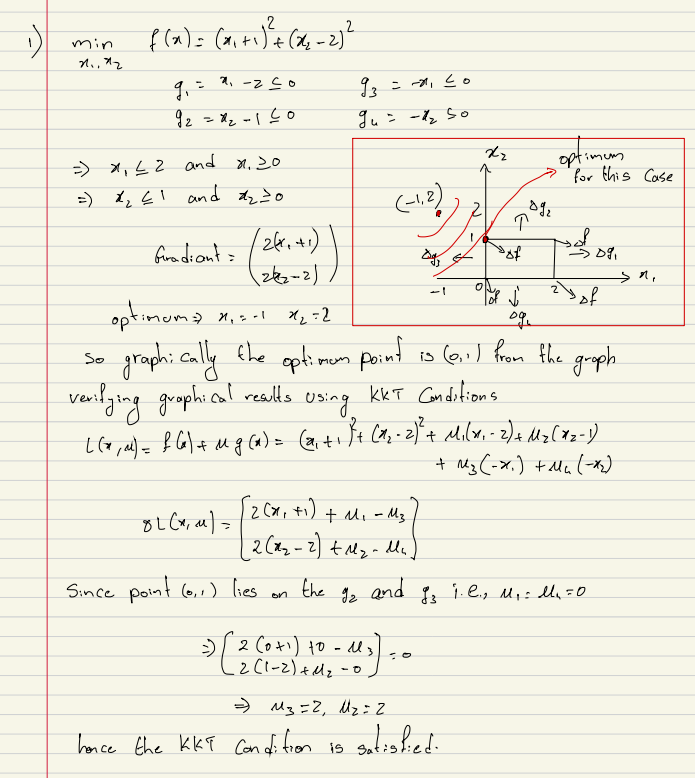

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)



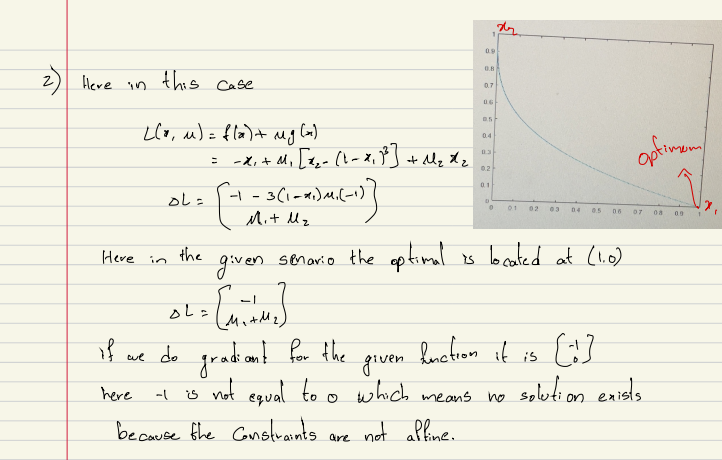

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.



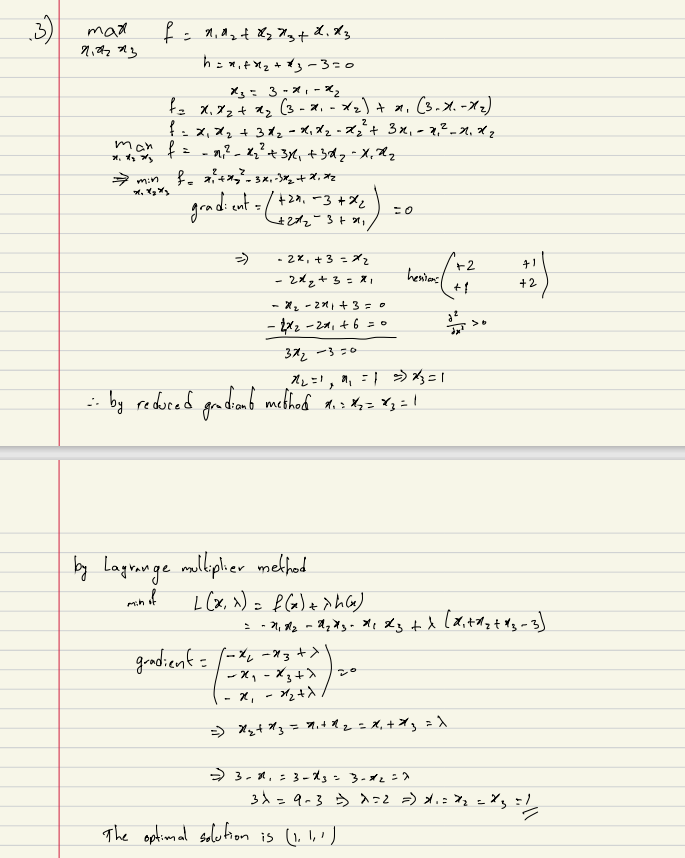

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 



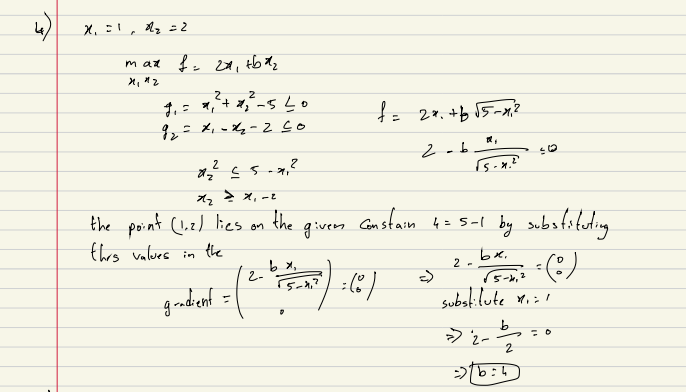

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

In [22]:
import numpy as np
from numpy.linalg import inv
obj = lambda x: (x[0] ** 2 + x[1] ** 2 + x[2] ** 2)
cons1 = lambda x: (x[0] ** 2 / 2 + x[1] ** 2 / 5 + x[2] ** 2 / 25 - 1)
cons2 = lambda x: (x[0] + x[1] - x[2])
h = np.array([cons1, cons2])
def df_dd(x):
    return np.array([2 * x[2]])
def df_ds(x):
    return np.array([2 * x[0], 2 * x[1]])
def dh_ds(x):
    return np.array([[x[0] / 2, 2 * x[1] / 5], [1, 1]])
def dh_dd(x):
    return np.array([[2 * x[2] / 25], [x[0] / 2]])
def Df_Dd(x):
    temp = np.matmul(np.matmul(df_ds(x), inv(dh_ds(x))), dh_dd(x))
    return np.array(df_dd(x) - temp)
def solve(x, s):
    while (np.linalg.norm(np.array([cons1(x), cons2(x)])) > eps):
        temp = (s.transpose() - (np.matmul(inv(dh_ds(x)), np.array([cons1(x), cons2(x)]))))
    return temp.transpose()

eps = 10 ** -3  # termination criterion
x0 = np.array([0.,0.,0.])  # initial guess
k = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[k]  # start with the initial guess
print(Df_Dd(x))
error = np.linalg.norm(Df_Dd(x))  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
a = 0.01  # set a fixed step size to start with
s = [x[0], x[1]]


# Armijo line search
def line_search(l, x):
    a = 1.  # initialize step size
    b = 0.5
    t = 0.3

    nine = np.matmul(dh_dd(x), Df_Dd(x).transpose())
    ten = np.matmul(inv(dh_ds(x)), nine)

    trail = np.append(x[2] - a * Df_Dd(x), s + a * ten)
    f_of_a = obj(trail)

def f_of_a(a, x):
    eleven = np.matmul(dh_dd(x), Df_Dd(x).transpose())
    twelve = (np.matmul(inv(dh_ds(x)), eleven)).transpose()
    trail = np.append(x[2] - a * Df_Dd(x), s + a * twelve)
    f_of_a = obj(trail)
    return f_of_a

def phi(a, x):
    return obj(x)-a*t*np.matmul(Df_Dd(x),Df_Dd(x).transpose())

while phi(a, x) < f_of_a(a,x):  # while phi(a,x)<obj(x-a*grad(x)): # if f(x+a*d)>phi(a) then backtrack. d is the search direction
    a = b*a
return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    a = line_search(Df_Dd(x), x)  # 4.1
    x[2] = x[2] - a * (Df_Dd(x))  # 4.2
    s = s + a * (inv(dh_ds(x)) * (dh_dd(x)) * (df_dd(x)).transpose()).transpose()  # 4.3
    s = solve(x, s)
    soln.append(x)
    error = np.linalg.norm(grad(x))
soln  # print the search trajectory

LinAlgError: ignored